In [1]:
import tensorflow as tf   
import matplotlib.pyplot as plt     
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
# INICIANDO A CONSTRUÇÃO DO MODELO

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()      # INSTANCIANDO A BIBLIOTECA KERAS, POR MEIO DO TENSORFLOW E CARREGANDO O DATASET MNIST POR MEIO DecisionTreeClassifier

11501568/11490434 [==============================] - 18s 2us/step


In [3]:
''' CRIANDO TAMBÉM AS VARIAVEIS QUE ESTÃO ASSOCIADAS A ESSA INSTANCIAÇÃO, QUE NESSE CASO SÃO O CONJUNTO DE TREINAMENTO E O CONJUNTO DE TEST, ONDE TAMBÉM ESTÃO SENDO SEPARADOS OS ROTULOS E AS IMAGENS '''

''' AS PARTES x_train E x_test CONTÊM CÓDIGOS RGB EM ESCALA DE CINZA (DE 0 A 255), ENQUANTO AS PARTES y_train E y_test CONTÊM ROTULOS DE 0 A 9 QUE REPRESENTA QUAL NÚMERO ELES REALMENTE SÃO'''

' AS PARTES x_train E x_test CONTÊM CÓDIGOS RGB EM ESCALA DE CINZA (DE 0 A 255), ENQUANTO AS PARTES y_train E y_test CONTÊM ROTULOS DE 0 A 9 QUE REPRESENTA QUAL NÚMERO ELES REALMENTE SÃO'

In [10]:
image_index = 6615     # AQUI ESTAMOS SELECIONANDO A IMAGEM QUE QUEREMOS (PODEMOS SELECIONAR QUALQUER UMA ATÉ 60.000)

In [11]:
print(y_train[image_index]


SyntaxError: unexpected EOF while parsing (<ipython-input-11-ce6c2ceb623e>, line 1)

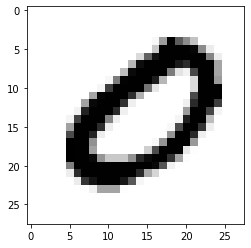

In [12]:
plt.imshow(x_train[image_index], cmap='Greys') #AQUI ESTAMOS TRAZENDO A FUNÇÃO IMSHOW, QUE PERTENCE AO MÓDULO PYPLOT DA BIBLIOTECA MATPLOTLIB, QUE É UTILIZADA PARA EXIBIR DADOS COMO UMA IMAGEM EM UMA RASTER REGULAR 2D

In [13]:
x_train.shape   # AQUI TRAZEMOS O ATRIBUTO SHAPE DO ARRAY NUMPY PARA PODER CONHECER A FORMA DO CONJUNTO DE DADOS (SABER A COMPOSIÇÃO DELE)


(60000, 28, 28)

In [14]:
# REMODELANDO E NORMALIZANDO AS IMAGENS

''' IREMOS REALIZAR A MODELAGEM PORQUE PARA PODERMOS UTILIZAR O DATASET NA API KERAS, PRECISAMOS DE MATRIZES NUMPY DE 4 DIMS. MÁS O ARRAY APRESNTADO SÃO 3 DIMS. TAMBÉM VAI SER NECESSÁRIO NORMALIZAR OS DADOS'''

x_train = x_train.reshape(x_train[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [15]:
x_train = x_train.astype('float32')     # AQUI ESTAMOS ESPECIFICANDO O TIPO DE DADO QUE QUEREMOS NOS CONJUNTOS DE TREINO E TESTE (CERTIFICANDO QUE OS CONJUNTOS ESTEJAM NO TIPO DETERMINADO)
x_test = x_test.astype('float32')

In [16]:
x_train /= 255  # AQUI ESTAMOS NORMALIZANDO OS CÓDIGOS RGB DIVIDINDO ELES PELO VALOR RGB MAXIMO
x_test /= 255

In [17]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])

x_train shape: (60000, 28, 28)
Number of images in x_train 60000


In [19]:
# CRIANDO O MODEL SEQUENCIAL E ADICIONANDO AS CAMADAS

model = Sequential()    # CRIANDO O MODELO SEQUENCIAL
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))    # ADICIONANDO A CAMADA CONVOLUCIONAL, COM OS PARAMETROS REFERENTES AO TAMANHO DA IMAGEM E DEFININDO O TAMANHO DO KERNEL (REMODELANDO PARA 3X3)
model.add(MaxPooling2D(pool_size=(2, 2)))   # ADICIONANDO A CAMADA DE POOL E DEFININDO O TAMANHO DELA PARA 2X2
model.add(Flatten())    # AQUI ESTAMOS ACHATANDO AS MATRIZES 2D PARA AS CAMADAS TOTALMENTE CONECTADAS
model.add(Dense(128, activation=tf.nn.relu))    # CRIANDO A CAMADA DENSA
model.add(Dropout(0.2))     # CRIANDO A CAMADA DE DROPOUT (PARA EVITAR O OVERFITTING NO TREINAMENTO)
model.add(Dense(10, activation=tf.nn.softmax)) # AQUI TRAZEMOS A FUNÇÃO DE ATIVAÇÃO A PARTIR DA INSTANCIAÇÃO DO TENSORFLOW (SOFTMAX É USADA PARA FORÇAR A SAIDA DE UMA REDE NEURAL A REPRESENTAR A PROBABILIDADE DOS DADOS SEREM DE UMA DAS CLASSES DEFINIDAS)

NameError: name 'input_shape' is not defined

In [20]:
# COMPILANDO E AJUSTANDO O MODELO

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accurancy'])
# ACIMA ESTAMOS DEFININDO UM OTIMIZADOR COM UMA DETERMINADA FUNÇÃO DE PERDA QUE USA UMA MÉTRICA
model.fit(x=x_train, y=y_train, epochs=10) # AQUI ESTAMOS AJUSTANDO O MODELO USANDO OS DADOS

Epoch 1/10


ValueError: in user code:

    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\engine\training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\losses.py:1739 sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\keras\backend.py:4957 sparse_categorical_crossentropy
        labels=target, logits=output)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\ops\nn_ops.py:4352 sparse_softmax_cross_entropy_with_logits_v2
        labels=labels, logits=logits, name=name)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\55719\documents\github\projectg-idea\python\python projects\lib\site-packages\tensorflow\python\ops\nn_ops.py:4259 sparse_softmax_cross_entropy_with_logits
        logits.get_shape()))

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 28)).


In [ ]:
# AVALIANDO O MODELO (AVALIANDO O MODEL TREINADO COM X_TEST E Y_TEST)

model.evaluate(x_test, y_test)  # COM ISSO PODEMOS AVALIAR O MODELO DOS CONJUNTOS DE TEST X E Y

628


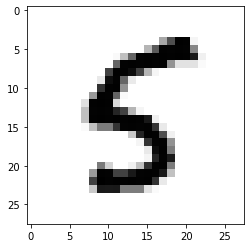

In [25]:
# FAZENDO PREVISÕES INDIVIDUAIS

image_index = 1252 # SELECIONANDO A IMAGEM QUE QUEREMOS (ESCOLHA DE 0 A 60.000)
plt.imshow(x_test[~image_index].reshape(28, 28), cmap='Greys')  # PLOTANDO A IMAGEM
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax()) # PRINTANDO A PARTIR DA INSTANCIAÇÃO PRED, A CLASSFICAÇÃO (PREDIÇÃO) DA IMAGEM SELECIONADA